## Building Footprints and Heights Data

[Google Earth Engine Apps](https://sat-io.earthengine.app/view/gba) hosts GlobalBuildingAtlas data, which contains footprints and heights of buildings worldwide. Google Earth Engine sorts the data into panels. 

To access, you can select a panel that contains your area of interest. From there, you can download the file or copy the url link. In this notebook, data will be loaded in directly using a url.

### Steps for Access

In [ ]:
# Load necessary libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

In [38]:
## This step may take a few seconds ##

# Specify tile download url; this url is for area containing Santa Barbara, CA
url = 'https://data.source.coop/tge-labs/globalbuildingatlas-lod1/w120_n35_w115_n30.parquet'

# Read the parquet file into a DataFrame
df = pd.read_parquet(url)

# Display the first few rows and confirm data type
print(type(df))
print(df.head())

   source             id    height       var region  \
0  google  85462X6M+6P29  0.593977  0.266378    MEX   
1  google  85462XJC+97CF  1.242497  0.375091    MEX   
2  google  85462XJC+93WR  3.569647  0.333383    MEX   
3  google  85462XJC+C3MX  3.547499  0.278828    MEX   
4  google  85462XJC+G248  1.096296  0.098254    MEX   

                                                bbox  \
0  {'xmin': -115.01574894346501, 'ymin': 32.01048...   
1  {'xmin': -115.02951566605297, 'ymin': 32.03090...   
2  {'xmin': -115.029850167836, 'ymin': 32.0309691...   
3  {'xmin': -115.029862555864, 'ymin': 32.0310179...   
4  {'xmin': -115.03003018059, 'ymin': 32.03120930...   

                                            geometry  
0  b"\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...  
1  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x...  
2  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...  
3  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...  
4  b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...  
<c

From the exploration, we can see that this dataframe contains geometry information in a column called `bbox`. This column stores dictionaries with building limits in it. In order to plot our data as polygon objects, we need to create a `geometry` column from `bbox`.


In [ ]:
# Extract limit information from `bbox` column using shapely
df["geometry"] = df["bbox"].apply(
    lambda b: box(b["xmin"], b["ymin"], b["xmax"], b["ymax"])
)

In [17]:
# Convert dataframe to a geopandas object
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

# Confirm transformation worked
gdf.head()

### Visualizing our Data

<Axes: >

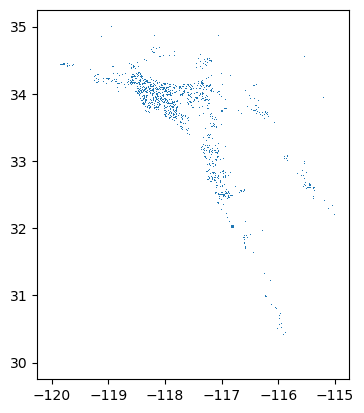

In [19]:
# Plotting all of the data takes an extremely long time -- we will clip to just Santa Barbara, CA
# gdf.plot()

In [21]:
# Crop to only SB for quicker compute times

# Create Santa Barabara bounding box (bounds sourced from LLM)
sb_bbox = [-119.75, 34.38, -119.60, 34.47]

# Clip data frame to contain only SB geometries
gdf_sb = gpd.clip(gdf, sb_bbox)

TypeError: (<class 'geopandas.geoseries.GeoSeries'>, <class 'dict'>)

Text(0.5, 1.0, 'Heights of Buildings in Santa Barbara (m)')

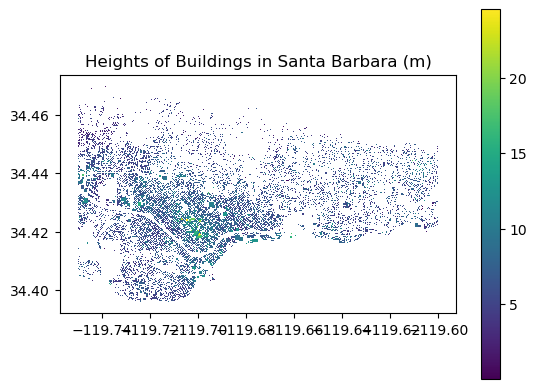

In [37]:
# Create preliminary plot of buildings in SB, with them colored by their height in meters

gdf_sb.plot(column = 'height',
           legend = True)

plt.title("Heights of Buildings in Santa Barbara (m)")

### Adding Census Data

In [ ]:
# Read in census data
census = gpd.read_file("census")

# Change CRS to match building data
census = census.to_crs(4326)

census.head()

In [ ]:
# Clipped census data
clipped_census = gpd.clip(census, sb_bbox)

In [ ]:
# Initialize plot with two axes, buildings and census tracts
fig, ax = plt.subplots(figsize=(9,5), nrows = 1, ncols = 1)

gdf_sb.plot(ax = ax,
        column = 'height',
        legend = True)

clipped_census.boundary.plot(ax = ax,
                            color = "red")

plt.title("Heights of Buildings in Santa Barbara (m), Overlayed with Census Tracts")
plt.show()

In [ ]:
# Unimportant: code to check current directory
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)